<div class="cite2c-biblio"></div><img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> INF-493 - Machine Learning</h1>
    <h1> Tarea 2 - Métodos para Clasificación </h1>
</center>
<p>
<br><center>_Javier Reyes_<strong> - </strong>_javier.reyes.12@sansano.usm.cl_<strong> - </strong>_201273524-6_ </center>
<br><center>_Marco Salinas_<strong> - </strong>_marco.salinas.12@sansano.usm.cl_<strong> - </strong>_201273589-0_ </center>
</p>

#  1 Tipos de Fronteras en Clasificación


In [2]:
import numpy as np
from sklearn.utils import check_random_state

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p  style="text-align: justify;"> 
    **(a)** Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada
conjunto y visualícelos.
</p>

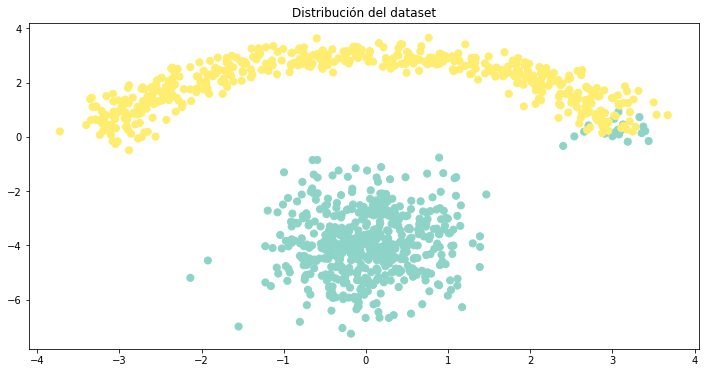

El primer conjunto tiene 520 datos 
El segundo conjunto tiene 480 datos


In [3]:
import matplotlib.pyplot as plt

X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n) #media luna
y = np.concatenate((y1,y2),axis=0)

def plot(x,y):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.Set3)
    plt.title("Distribución del dataset")
    plt.show()
    
plot(X,y)
    
print("El primer conjunto tiene " + str(len(y1))
     + " datos \nEl segundo conjunto tiene " + str(len(y2)) + " datos")

<p  style="text-align: justify;"> 
    **(b)** Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.
</p>

In [4]:
import math
import matplotlib.mlab as mlab
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.Set3)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.cool)
    plt.title(title)
    plt.show()
    

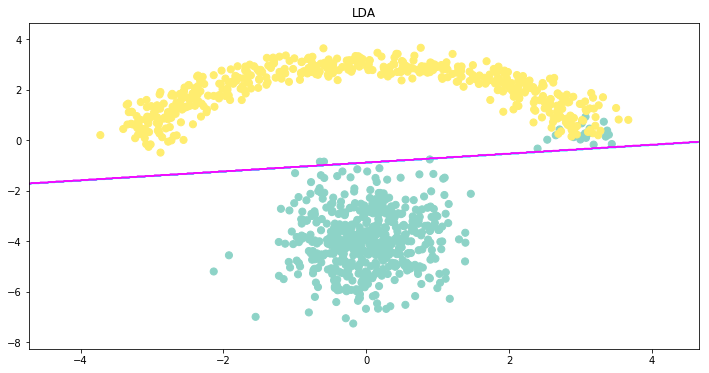

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

<p  style="text-align: justify;"> 
    Se puede observar que el conjuto de datos 1 esta separado de una manera uniforme, pero en uno de sus extremos se mezclan con los datos del conjunto 2, haciendo imposible una separación para discriminar los datos con el algoritmo de LDA (a través de una recta). La única manera de poder utilizar el clasificador, es eliminando los outlayers, aunque esto es muy riesgoso porque pueden ser información valiosa.
</p>
    
<p  style="text-align: justify;"> 
    **(c)** Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?
    
</p>

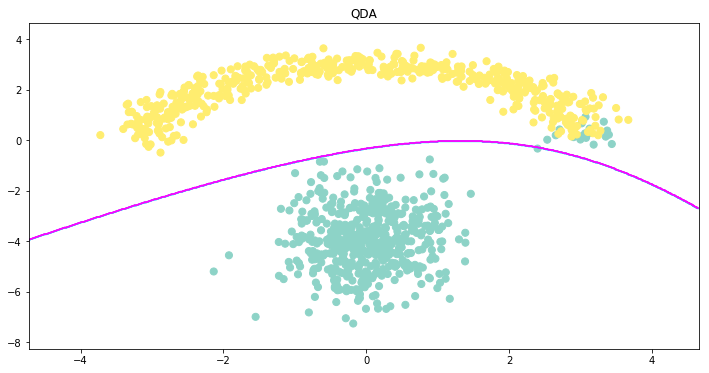

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import math as ma
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>
<p  style="text-align: justify;"> 
    Al igual que en el caso de LDA, la separación entre ambos conjuntos es imposible, pero en este caso, QDA logra delimitar de mejor manera los conjutos integrando más datos al conjunto de datos azules. 
</p>

<p  style="text-align: justify;">
    <ul>
        <li>Semejanzas
            <ul>
                <li>Ambos métodos de clasificación no pueden separar en un 100% el conjunto de datos.</li>
                <li>Aunque el tipo de separación es distinta, la cantidad de puntos que separan es prácticamente la misma.</li>
            </ul>
        </li>
        <li>Diferencias
            <ul>
                <li>El tipo de separación para clasificar los datos es distinta: LDA - línea recta; QDA - parábola.</li>
                <li>QDA prioriza la separación en donde está más centrado un tipo de datos, mientras que LDA tiende a separar a la "mitad" el dataset.</li>
            </ul>
        </li>
    </ul>
</p>
<p  style="text-align: justify;">
    Tanto LDA como QDA asumen una distribución de probabilidad normal o Gaussiana.
</p>

<p  style="text-align: justify;"> 
    **(d)** Compare cuantitativamente los clasificadores LDA y QDA en este dataset sintético mediante la métrica
de error de clasificación.

</p>

In [7]:
from sklearn.metrics import accuracy_score

y_pred_qda = model_QDA.predict(X)
y_pred_lda = model_LDA.predict(X)
print("Miss Classification Loss for LDA: %f"%(1-accuracy_score(y, y_pred_lda)))
print("Miss Classification Loss for QDA: %f"%(1-accuracy_score(y, y_pred_qda)))

Miss Classification Loss for LDA: 0.022000
Miss Classification Loss for QDA: 0.019000


<p  style="text-align: justify;"> 
    **(e)** Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma $l_2$), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

</p>

In [8]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR(C=param,penalty='l2')
    model.fit(X,y)
    return model

p_min = 0.01
p_max = 1
interactive(visualize_border_interactive,param=(p_min,p_max, 0.01))

A Jupyter Widget

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>
<p  style="text-align: justify;"> 
Al aplicar la penalización con la norma $l_2$, lo que hace la $Logistic Regression$ es ir penalizando los datos con la regla de $Lasso$, es decir, que a mayor $\lambda$ mayor es la penalización. Es por esto que al aumentar la penalización, los límites de separación se irán ajustando de manera que quede lo más equilibrado posible, aunque esto implique "pasarse" un poco de la pendiente normal que tenía la recta al utilizar LDA.
<br>
Como se puede observar, en $p_{min}$ se obtiene la separación con LDA y mientras aumenta el valor de la penalización hasta llegar al valor $p_{max}$ se tendrá la "mejor" separación o la más equitativa entre los datos. Notar que llegando al valor $p = 0.6$ luego si se sigue aumentando el valor de $p$, la pendiente de la recta no aumentará, por lo que se llegá a la mejor separación entre los límites de los conjuntos.
</p>

<p  style="text-align: justify;"> 
    **(f)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

</p>

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

#use interactive
p_min = 0.0001
p_max = 1
interactive(visualize_border_interactive,param=(p_min,p_max, 0.001))

A Jupyter Widget

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>
<p  style="text-align: justify;"> 
Las $SMV$ se caracterizan por maximizar la mínima distancia de un punto de un conjuto al hiperplano, por lo que en este caso, se tendrá que aplicar el parámetro $C$ para poder clasificar de una mejor manera los datos. La función que cumple el parámetro $C$ es similar a la norma $l_2$ en $Logistic Regression$, ya que este se encarga de decirle a la $SVM$ cuántos datos mal clasificados quieres evitar. Si se tiene un $C$ pequeño, se tendrá un mayor margen de la separación al hiperplano incluso si hay elementos mal clasificados, en cambio con un $C$ grande, la $SVM$ buscará el margen al hiperplano más pequeño.
</p>

<p  style="text-align: justify;"> 
    **(g)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.
</p>

In [10]:
def visualize_border_interactive(param, kernel):
    model = train_model(param, kernel)
    visualize_border(model,X,y)

def train_model(param, kernel):
    model= SVM()
    model.set_params(C=param,kernel=kernel)
    model.fit(X,y)
    return model

#use interactive
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max, 1), kernel = ['rbf','poly','linear'])

A Jupyter Widget

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>

<p  style="text-align: justify;">
    <ul>
        <li>C - RBF: Para el kernel <i>Radial Basic Function</i>, lo que hace $C$ es disminuir el "radio" que encierra al conjunto de datos amarillo. $C$ actúa de la misma manera anteriormente descrita, por lo que a un mayor $C$, el "radio" será menor.
        </li>
        <li>C - Poly: Para el kernel <i>Polinomial</i>, lo que hace $C$ es ir ajustando el polinomio a la separación óptima de los conjuntos de datos
        </li>
        <li>C - Linear: Es una $SVM$ normal, se discutió en la pregunta anterior.
        </li>
    </ul>
</p>

<p  style="text-align: justify;"> 
    **(h)** Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profunidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.
</p>

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree
def visualize_border_interactive(param,criterion):
    model = train_model(param,criterion)
    visualize_border(model,X,y)

def train_model(param,criterion):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y)
    y_pred = model.predict(X)
    print ("Accuracy is : {0:.1f}%".format(accuracy_score(y,y_pred)*100))
    return model

#use interactive
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max, 1),criterion = ['gini','entropy','variance'])

A Jupyter Widget

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>
<p  style="text-align: justify;"> 
    En este caso, los 3 criterios $gini$,$entropy$ y $variance$ se comportan de la misma manera en el Árbol de decisión. Lo que permite una mayor profundización en el árbol, es tener tantas separaciones de tal manera de obtener un conjunto de datos dentro de un espacio $A$ y otro en el espacio $B$, es decir, encacillar los conjuntos de datos.
    <br>
    Para este caso, el valor máximo de profundidad es $h_{max} = 11$ en donde se obtiene un 100% de acierto al separar el conjunto de datos amarillos del azul. Al seguir aumentando la cantidad de profundidad, lo único que se logra es separar los datos de otra manera.
</p>

<p  style="text-align: justify;"> 
    **(i)** Construya un algoritmo $k-NN$ para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro $k$. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

</p>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    y_pred = model.predict(X)
    print ("Accuracy is : {0:.1f}%".format(accuracy_score(y,y_pred)*100))
    return model


k_min = 1
k_max = 20
interactive(visualize_border_interactive,param=(k_min,k_max))

A Jupyter Widget

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>
<p  style="text-align: justify;"> 
La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los $k$ ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados, es por esto que al aumentar la cantidad de vecinos $k$, el ruido o sesgo de los datos debería disminuir, aunque depende netamente de los datos.
<br>
EL algoritmo $k-NN$ actúa localmente buscando los vecinos más cercanos, los cuales se espera nos den la mejor clasificación. Para este caso, basta tomar $k = 1$ para obtener una separación perfecta entre los conjuntos de datos, ya que a medida de que se aumenta el número de vecino $k$, el porcentaje de acierto de clasificación llega como máximo al $98.5\%$. Notar que cuando los vecinos son impares, el porcentaje de acierto es más alto. 
</p>

# 2 Análisis de audios como datos brutos

<p  style="text-align: justify;"> 
    En esta parte de la experencia se trabajará con datos de audios los cuales son directamente extraídos desde datos fuentes _.wav_, lo que corresponde a una señal de sonido en diferentes tiempos. El _dataset_ se denomina _ Heartbeat Sounds_, el cual consta de grabaciones de sonidos de latidos cardíacos normales y anormales, con distintas categorías para los latidos anormales. Los datos fueron obtenidos desde un publico general a través de la aplicación de iPhone iStethoscope Pro.

</p>

In [13]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100

def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

<p  style="text-align: justify;"> 
    **(a)** Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

</p>

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

<p  style="text-align: justify;">
    El _dataset_ posee 176 datos, los cuales poseen 4 columnas cada uno.
    <ul style="list-style-type:disc;margin-left:24px">
        <li>**dataset:** columna que indica a que dataset corresponde el dato</li>
        <li>**fname:** corresponde al nombre del archivo de audio</li>
        <li>**label:** puede ser "normal", estar en blanco (para datos sin etiqueta), y anormales donde pueden ser "artifac", "extrahls" y "murmur". </li>
        <li>**sublabel:** columna sin datos.</li>

    </ul>

</p>

<p  style="text-align: justify;">
    Descripcion de las categorias:
    <ul style="list-style-type:disc;margin-left:24px;text-align: justify;">
        <li>**Normal:** Corresponden a sonidos de corazones normales y saludables.</li>
        <li>**Murmur (Soplo):** Corresponden a soplos cardíacos, que suenan como si hubiera un ruido de "silbido, rugido, estruendo o fluido turbulento". </li>
        <li>**Extra Heart Sound:** Correspoden a una medición en la cual se escucha un sonido adicional del corazón.  </li>
        <li>**Artifact:** En esta categoria se encuentra una amplia gama de sonidos diferentes, que incluyen chillidos y ecos de realimentación, voz, música y ruido. Gerenalmente no hay sonidos cardíacos discernibles. Esta categoría es la más diferente de las otras. </li>
        <li>**Unlabelled:** Son aquellas muestras que no estan etiquetadas en ninguna categoria. </li>
    </ul>
</p>

|     Categoria     	| Registro 	|
|:-----------------:	|:--------:	|
|       Normal      	|    31    	|
|       Murmur      	|    34    	|
| Extra Heart Sound 	|    19    	|
|      Artifact     	|    40    	|
|     Unlabelled    	|    52    	|

In [15]:
df.drop(['dataset','sublabel',],axis=1,inplace=True)

In [16]:
print("Artifact",df.label.value_counts()['artifact'])
print("Murmur", df.label.value_counts()['murmur'])
print("Extra Heart Sound", df.label.value_counts()['extrahls'])
print("Normal", df.label.value_counts()['normal'])
print("Unlabelled", 176-40-34-19-31)

Artifact 40
Murmur 34
Extra Heart Sound 19
Normal 31
Unlabelled 52


<p  style="text-align: justify;"> 
    **(b)** Lea los archivos _.wav_ y transformelos en secuencias de tiempo. Realice un _padding_ de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

</p>

In [17]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series'] = new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

<p  style="text-align: justify;"> 
    **(c)** Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto,
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

</p>

In [18]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
             1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
             2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

In [19]:
print("Artifact",new_df.target.value_counts()['artifact'])
print("Murmur", new_df.target.value_counts()['murmur'])
print("Normal and EHSound", new_df.target.value_counts()['normal/extrahls'])

Artifact 58
Murmur 53
Normal and EHSound 65


|          Categoria         	| Registro 	|
|:--------------------------:	|:--------:	|
| Normal / Extra Heart Sound 	|    65    	|
|           Murmur           	|    53    	|
|          Artifact          	|    58    	|

<p  style="text-align: justify;"> 
    **(d)**  Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


</p>

In [20]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df.head()

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,0
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,0
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,0
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,0


<p  style="text-align: justify;"> 
    **(e)** Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?

</p>

In [21]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

<p  style="text-align: justify;"> 
    **(f)** Para pre procesar la secuencia en el tiempo realice una Transformada de Fourier discreta para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.

</p>

In [22]:
X_fourier = np.abs(np.fft.fft(X))

<p  style="text-align: justify;"> 
    **(g)**  Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


</p>

In [23]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)

X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

<p  style="text-align: justify;"> 
    **(h)**  Genere un conjunto de pruebas mediante la técnica _hold-out validation_ para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?



</p>

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)

print("El set de entrenamiento tiene " + str(len(X_train)) 
      + " y el set de test tiene " + str(len(X_test)) 
      + " datos, y ambos tienen 10000 clases")

El set de entrenamiento tiene 132 y el set de test tiene 44 datos, y ambos tienen 10000 clases


<p  style="text-align: justify;"> 
    **(i)**  Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.
</p>

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p  style="text-align: justify;"> 
    **(j)**  Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.
</p>

In [26]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)


<p  style="text-align: justify;"> 
    **(k)**  Entrene un modelo de Regresión Logística variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion $C$ en el mismo rango que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.
</p>

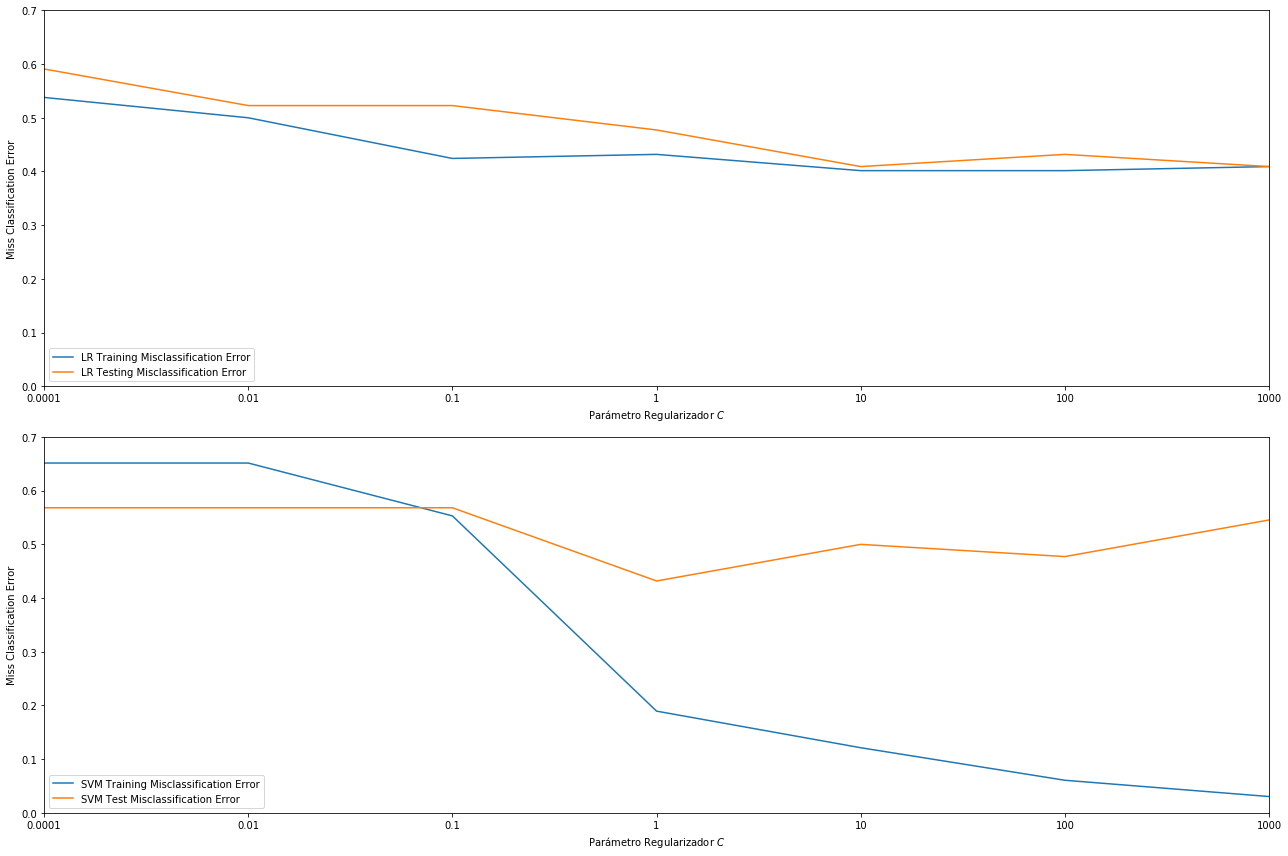

In [27]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

mse_LR_train = []
mse_LR_test = []

mse_SVM_train = []
mse_SVM_test = []

Ks = []
Ks_ticks = [0.0001,0.01,0.1,1,10,100,1000]

for i, Cs in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
    
    model_LR = LR(C=Cs)
    model_SVM = SVM(C=Cs)
    
    model_LR.fit(X_pca_train, y_train)
    model_SVM.fit(X_pca_train, y_train)
    
    y_pred_LR_train = model_LR.predict(X_pca_train)
    y_pred_LR_test = model_LR.predict(X_pca_test)
    
    y_pred_SVM_train = model_SVM.predict(X_pca_train)
    y_pred_SVM_test = model_SVM.predict(X_pca_test)

    mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
    mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))
    
    mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
    mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))
    
    Ks.append(i+1)
    
    #print("Miss Classification Loss for LR: %f"%(1-accuracy_score(y_train, y_pred_LR)))
    #print("Miss Classification Loss for SVM: %f"%(1-accuracy_score(y_train, y_pred_SVM)))
    
    #print("C=%.5f" % Cs)
    

plt.figure(figsize=(18,12))

LR_plot = plt.subplot(2,1,1)
LR_plot.plot(Ks, mse_LR_train, label='LR Training Misclassification Error')
LR_plot.plot(Ks, mse_LR_test, label='LR Testing Misclassification Error')
plt.legend(loc=3)
plt.xlabel('Parámetro Regularizador $C$')
plt.ylabel('Miss Classification Error')
plt.axis([1,6,0.0, 0.7])
plt.xticks(Ks, Ks_ticks)

SVM_plot = plt.subplot(2,1,2)    
SVM_plot.plot(Ks, mse_SVM_train, label = 'SVM Training Misclassification Error')
SVM_plot.plot(Ks, mse_SVM_test, label = 'SVM Test Misclassification Error')
plt.legend(loc=3)
plt.xlabel('Parámetro Regularizador $C$')
plt.ylabel('Miss Classification Error')
plt.axis([1,6,0.0, 0.7])
plt.xticks(Ks, Ks_ticks)

plt.tight_layout()

#plt.xlabel('Parametro Regularización $C$')
#plt.ylabel('Miss Classification Error')

plt.show()

<p  style="text-align: justify;"> 
    **(l)**  Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro regularizador _max depth_, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.
</p>

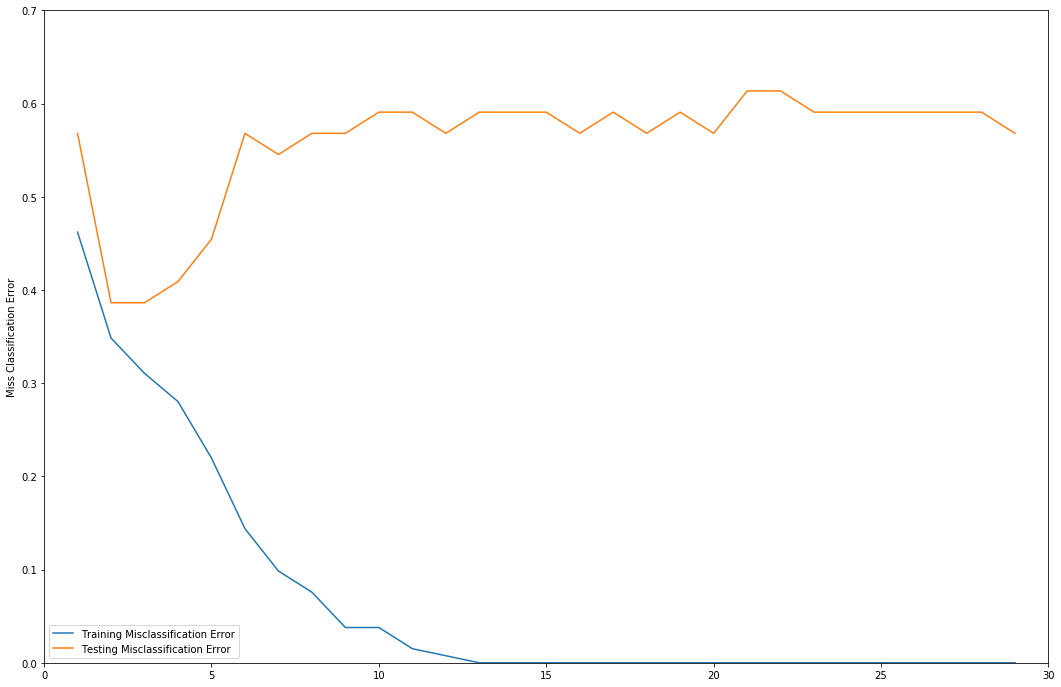

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC

Depths = range(1,30)

mse_DTC_train = []
mse_DTC_test = []

for i in Depths:
    model_DTC = DTC(max_depth = i)
    
    model_DTC.fit(X_pca_train, y_train)
    
    y_pred_DTC_train = model_DTC.predict(X_pca_train)
    y_pred_DTC_test = model_DTC.predict(X_pca_test)
    
    mse_DTC_train.append(1-accuracy_score(y_train, y_pred_DTC_train))
    mse_DTC_test.append(1-accuracy_score(y_test, y_pred_DTC_test))

plt.figure(figsize=(18,12))

DTC_plot = plt.subplot(1,1,1)
DTC_plot.plot(Depths, mse_DTC_train, label='Training Misclassification Error')
DTC_plot.plot(Depths, mse_DTC_test, label='Testing Misclassification Error')
plt.legend(loc=3)
plt.ylabel('Miss Classification Error')
plt.axis([0,30,0.0, 0.7])

plt.show()


<p  style="text-align: justify;"> 
    **(m)**  Experimente con diferentes dimensiones $d$ para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.
</p>

In [29]:
from sklearn.decomposition import PCA
import ipywidgets as widgets

def plots_MCE_PCA(D, C_LR, C_SVM):
    mse_LR_train = []
    mse_LR_test = []
    mse_SVM_train = []
    mse_SVM_test = []

    model_LR = LR(C=1000)
    model_SVM = SVM(C=1)

    dim = np.arange(1,D)

    for d in range(1,D):

        pca_model = PCA(n_components=d)
        pca_model.fit(X_train)

        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)

        model_LR.fit(X_pca_train, y_train)
        model_SVM.fit(X_pca_train, y_train)

        y_pred_LR_train = model_LR.predict(X_pca_train)
        y_pred_LR_test = model_LR.predict(X_pca_test)

        y_pred_SVM_train = model_SVM.predict(X_pca_train)
        y_pred_SVM_test = model_SVM.predict(X_pca_test)

        mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
        mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))
        mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
        mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))


    plt.figure(figsize=(18,12))

    LR_plot = plt.subplot(2,1,1)
    LR_plot.plot(dim, mse_LR_train, label='LR Training Misclassification Error')
    LR_plot.plot(dim, mse_LR_test, label='LR Testing Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')

    SVM_plot = plt.subplot(2,1,2)    
    SVM_plot.plot(dim, mse_SVM_train, label = 'SVM Training Misclassification Error')
    SVM_plot.plot(dim, mse_SVM_test, label = 'SVM Test Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')
    plt.tight_layout()

    #plt.xlabel('Parametro Regularización $C$')
    #plt.ylabel('Miss Classification Error')

    plt.show()  

widgets.interact(plots_MCE_PCA,D = (1,20),C_LR = (1,1000,1),C_SVM=(1,1000,1))

A Jupyter Widget

<function __main__.plots_MCE_PCA>

<p  style="text-align: justify;"> 
    **(n)**  Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en $2$ dimensiones.
</p>

C:\Users\Laburo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


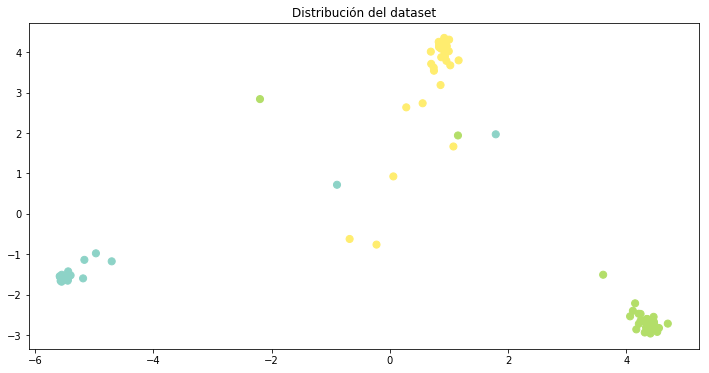

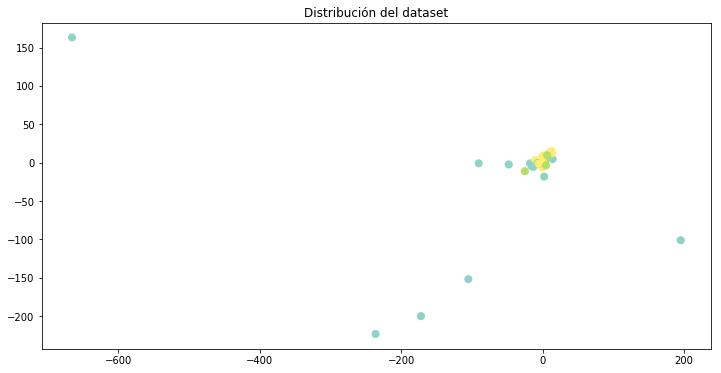

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

plot(X_pca_train, y_train)
plot(X_pca_test, y_test)

#y_pred_lda = model_lda.predict(X_pca_train)

#visualize_border(model_lda, X_train, y_train,"LDA")
#print(X_pca_train)
#https://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training

<p  style="text-align: justify;"> 
    **(o)**  Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.
</p>

C:\Users\Laburo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


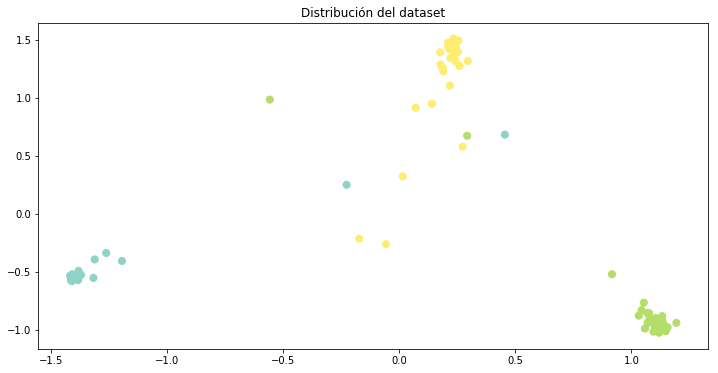

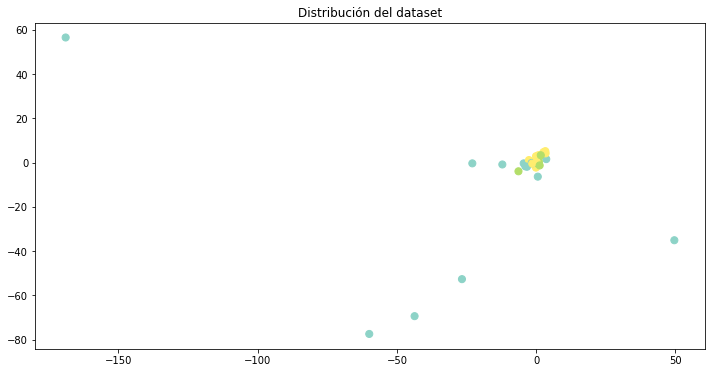

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_pca_train)
X_train = std.transform(X_pca_train)
X_test = std.transform(X_pca_test)

plot(X_train, y_train)
plot(X_test, y_test)

<p  style="text-align: justify;"> 
   Mejora la situación, debido a que los límites en donde están distribuidos los data sets disminuyeron.
   <ul>
       <li>Gráfico 1:
           <ul>
             <li>Eje $y$: de 4 a 1.5 en el límite superior y de -3 a -1 en el límite inferior</li>
             <li>Eje $x$: de 4 a 1 en el límite superior y de -6 a -1.5 en el límite inferior</li>
           </ul>
       </li>
       <li>Gráfico 2:
            <ul>
             <li>Eje $y$: de 150 a 60 en el límite superior y de -200 a -80 en el límite inferior</li>
             <li>Eje $x$: de 200 a 50 en el límite superior y de -600 a -150 en el límite inferior</li>
           </ul>
       </li>
   </ul>
</p>

<p  style="text-align: justify;"> 
    **(p)**  Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias características (_feature crafting_) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.
</p>

- [6]  https://www.kaggle.com/primaryobjects/voicegender/data
- [7]  Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition: A Review. vol, 5, 58-63.


# 3 Análisis de emociones en tweets

<p  style="text-align: justify;"> 
    **(a)**  Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el _dataset_.

</p>

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
import pandas as pd
import re
df = pd.read_csv('./text_emotion.csv')

| Sentimiento | Registro |
|:-----------:|:--------:|
|   Neutral   |   8638   |
|    Worry    |   8459   |
|  Happiness  |   5209   |
|   Sadness   |   5165   |
|     Love    |   3842   |
|   Surprise  |   2187   |
|     Fun     |   1776   |
|    Relief   |   1526   |
|     Hate    |   1323   |
|    Empty    |    827   |
|  Enthusiasm |    759   |
|   Boredom   |    179   |
|    Anger    |    110   |

<p  style="text-align: justify;"> 
    **(b)**  Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos.
</p>

In [ ]:
import numpy as np
np.random.seed(22)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)

#print(df['content'][2])
df.head()

<p  style="text-align: justify;"> 
    **(c)**  Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.

</p>

In [ ]:
df.drop(['tweet_id','author'],axis=1,inplace=True)

In [ ]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\[\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]


tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

#print(preprocess(df['content'][0]))

#df['content'] = df['content'].str
df['content'] = df['content'].apply(preprocess)

df.head()

In [ ]:
stop_words = ["rt","via","a","able","about","across","after","all","almost","also","am","among","an","and","any","are","as","at","be","because","been","but","by","can","cannot","could","dear","did","do","does","either","else","ever","every","for","from","get","got","had","has","have","he","her","hers","him","his","how","however","i","if","in","into","is","it","its","just","least","let","like","likely","may","me","might","most","must","my","neither","no","nor","not","of","off","often","on","only","or","other","our","own","rather","said","say","says","she","should","since","so","some","than","that","the","their","them","then","there","these","they","this","tis","to","too","twas","us","wants","was","we","were","what","when","where","which","while","who","whom","why","will","with","would","yet","you","your"]
stop = stopwords.words('english')
result = list(set(stop)|set(stop_words)|set(list('abcdefghijklmnopqrstuvwxyz')) | set(list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')) | set(list('0123456789')))

df['content'] = df['content'].apply(lambda x: [item for item in x if item not in result])
df.head()

<p  style="text-align: justify;"> 
    **(d)**  Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.

</p>

In [ ]:
uno = ['neutral', 'happiness', 'love', 'fun', 'relief', 'enthusiasm']

df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x in uno else -1)
df.sentiment.value_counts()

<p  style="text-align: justify;"> 
    **(e)**  Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets $\{t_i\}_{i=1}^{n}$ disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets.

</p>
<p  style="text-align: justify;">
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (_CountVectorizer_ y _TfidfVectorizer_). Recuerde realizar el ajuste (_fit_) únicamente con el conjunto de entrenamiento, para luego transformar el conjunto de pruebas (con el método transform).

</p>


- [12] http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature

In [ ]:
X = df['content'].values
y = df.sentiment.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CV_model = CountVectorizer(input=X_train, lowercase=False, preprocessor=None, tokenizer=None, stop_words=None)
CV_model.fit(X_train)
X_CV_train = CV_model.transform(X_train)
X_CV_test = CV.transform(X_test)

<p  style="text-align: justify;"> 
    **(f)**  Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

</p>

<p  style="text-align: justify;"> 
    **(g)**  Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?


</p>

In [ ]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(y_test, model.predict(X_test), target_names=['+','-']))

<p  style="text-align: justify;"> 
    **(h)**  [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

</p>

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print sentiment, text


<p  style="text-align: justify;"> 
    **(i)**  Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada _tweet_. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.


</p>

<p  style="text-align: justify;"> 
    **(j)**  Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada _tweet_, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

</p>

<p  style="text-align: justify;"> 
    **(k)**  Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest [14]
</p>

- [14]  http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)


<p  style="text-align: justify;"> 
    **(l)**  Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

</p>

In [ ]:
LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

<p  style="text-align: justify;"> 
    **(m)**  Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?


</p>